<a href="https://colab.research.google.com/github/Flor-Si/Trabajos/blob/main/TP8%20-Notebook_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

Un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

Si bien la recoleccion de los datos es uno de los pasos más importante de cualquier proyecto, el Data Scientist puede tener desde mucho hasta nada de control en esta etapa. Muy frecuentemente, los data scientist tienen que trabajar con datos guardados en archivos excel, o csv que proveen los clientes.

De cualquier manera, poder leer estos datos, organizarlos, darles el formato correcto, inspeccionarlos y manipularlos es una tarea escencial y requiere librerias especiales, que veremos a lo largo de esta Notebook.

<font size=5>  👩🏽‍🔬 Exploración de los datos 👩🏽‍💻</font>

Una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como <font color='#1ABC9C'>_"Analisis exploratorio de datos"_</font>.

Este análisis, que es parte de nuestra etapa de exploración y procesamiento de los datos, es muy importante ya que nos permitira descubrir patrones presentes en los datos. También permitira ver aquellos datos que se alejen del comportamiento esperado.

Cuando uno inicia un proyecto de Data Science el primer impulso es saltar a ajustar un modelo de machine learning. Sin embargo, es muy probable que no podamos explicar sus resultados, o no podamos entender que debemos ajustar si no hemos realizado previamente un analisis exploratorio.

Por este motivo, nos abocaremos a explorar nuestros datos en esta Notebook.

## Primera Parte: Describiendo los datos

Imaginemos la siguiente situación: Trabajas como data scientist en una empresa que comercializa distintos productos. La empresa tiene datos de ventas del Black Friday del año pasado. Tu Team leader te provee el dataset en el archivo `blackfriday.csv` y te pide que pienses en que proyecto puede surgir de allí que tenga utilidad para la empresa.

In [1]:
#importa pandas
import pandas as pd
import numpy as np

Recordemos que la sintaxis para poder leer un archivo csv es:
    
`df = pd.read_csv('archivo.csv', delimiter=',')`

Aunque muchas veces se omite el `delimiter` si el archivo esta separado por comas.

Lee el archivo csv `bkackfriday.csv` usando `pandas`. Guardalo en una variable llamada `blackfriday`.

In [2]:
blackfriday = pd.read_csv('/content/BlackFriday.csv')


Visualiza el DataFrame y observa cuantas filas y columnas tiene.

In [3]:
blackfriday.head() # Nos aparecen los NAN que son valores nulos o vacios - Ya que tengo letras y números. Y muestras las primeros filas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [5]:
blackfriday.shape # Conta función nos indica los registros (columnas y filas)

(537577, 12)

Nombre y tipo de datos en las columnas contenidas en `blackfriday`

In [6]:
blackfriday.columns # nombre de las columnas que tienen mi datafream

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
blackfriday.dtypes # vemos como es cada valor de las columnas si son objet "texto" o float "decimales" i int " n° enteros"

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


Chequea si tiene valores faltantes y ver las filas que los tienen.

In [8]:
blackfriday.isna().sum() # La función ISNA nos indica si hay valores nulos o no y SUM suma dichos valores nulos por columna tengo

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


In [4]:
blackfriday.isna() # Acá repetimos el valor de arriba pero lo que vamos realizando es solo que nos muestren los valores nulos cuando sale la sigla "TRUE"
#solo indica si la celda esta vacia "NaN", mientras las función isna(). Se utiliza para valores RAID NUMERICOS (solo números)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
203277,False,False,False,False,False,False,False,False,False,True,True,False
203278,False,False,False,False,False,False,False,False,False,False,True,False
203279,False,False,False,False,False,False,False,False,False,False,False,False
203280,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
blackfriday.isnull()#Nuestra lo mismo para los vacios pero cuando la celdas son OBJETOS

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
338794,False,False,False,False,False,False,False,False,False,False,False,False
338795,False,False,False,False,False,False,False,False,False,True,True,False
338796,False,False,False,False,False,False,False,False,False,False,False,False
338797,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
blackfriday[blackfriday.isna().any(axis=1)]
 #La función ANY Nos dice si tenemos algun valor que sea vacio , justo acá no tenemos
 #Y solo nos muestra las filas y columnas que al menos tienen algun valor un NaN un valor vacio y el resto los elimnina

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
...,...,...,...,...,...,...,...,...,...,...,...,...
537570,1004736,P00162442,M,18-25,20,A,1,1,1,16.0,NaN,15491
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [13]:
blackfriday[blackfriday['Gender'].isna()] #Filtra la columna Genero  y nos muestras todos los datos tengo un vacio o nulo

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


Detalles estadisticos de cada columna:

In [15]:
blackfriday.describe()# Me dan detalles estadisticos como la media, mediana,varianza y los percentiles

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Podemos ver tambien que valores o categorias estan incluidas en las columnas:

In [17]:
blackfriday["City_Category"].value_counts()# Esta funcion primero filtra por la categeria de la ciudad y los valores unicos por ejemplo tengo 3 categorias y las cantidades que tengo de cada una

,count
City_Category,
B,226493
C,166446
A,144638


In [19]:
blackfriday["City_Category"].value_counts(normalize=True)# Si yo ahora a la value_counts le agregamos NORMALIZE =TRUE , nos da un dato estadistico
# como si fuera de frecuencia o %

,proportion
City_Category,
B,0.421322
C,0.309623
A,0.269055


In [21]:
blackfriday["Marital_Status"].value_counts(normalize=True) # Aca volvemos a realizar la misma función pero con otra columna

,proportion
Marital_Status,
0,0.591203
1,0.408797


In [24]:
blackfriday['Stay_In_Current_City_Years'].unique() # no indica por al seleccionar la columna City year cuantas veces estuvo la persona en su ciudad
#natal con los valores que contiene en la celda que son unicos y de que tipo es el valor en este caso es texto =objeto

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
blackfriday['Stay_In_Current_City_Years'].value_counts()# Acá cuenta la cantidad de valores que hay de cada una de los valores

,count
Stay_In_Current_City_Years,
1,189192
2,99459
3,93312
4+,82889
0,72725


In [26]:
blackfriday['Stay_In_Current_City_Years'] = blackfriday['Stay_In_Current_City_Years'].str.replace('4+', '4', regex=False).astype(int)

In [29]:
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()# Acá al tener "&" nos indica que se tienen que cumplir las dos condiciones
#Esto nos dice de la columna City categoria que la ciudad se "A" y el estado de Materiales igual a CERO . Que busque el mayor valor

23958

In [30]:
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].min()# Lo mismo que lo anterior pero que cumpla el valor minimo


185

In [32]:
blackfriday[(blackfriday["Gender"] == 'F') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()


23955

In [5]:
blackfriday.groupby(by=['City_Category', 'Gender'])['Purchase'].mean()# Con la función GROUPBY primero tenemos que poner las categorias entre corchetes
# y lo que hace es agrupar por esas dos categorías y luego sacar la el promedio de la columna "Purchase =Compras"

City_Category  Gender
A              F          8654.662336
               M          9024.146169
B              F          8564.351127
               M          9391.083704
C              F          9273.712281
               M         10023.426631
Name: Purchase, dtype: float64

In [6]:
pd.crosstab(blackfriday["City_Category"], blackfriday["Product_Category_1"])

Product_Category_1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
City_Category,,,,,,,,,,,,,,,,,,
A,13197,2403,1870,1189,15923,2013,460,11996,37,490,2523,404,584,178,641,1046,54,291
B,21429,3827,3202,1921,23881,3124,617,17718,62,744,3903,606,838,217,985,1501,93,512
C,17512,2729,2532,1315,16523,2339,314,12798,51,633,2603,454,607,148,737,1088,65,354


## Parte 2: ¿Cómo visualizo mis datos?

Para poder visualizar los datos y la relación entre las distintas variables, podemos usar dos librerias: `matplotlib` y `seaborn`.

Documentación:
- [matplotlib](https://matplotlib.org/3.1.1/contents.html)
- [seaborn](https://seaborn.pydata.org/)

- Importamos la libreria `matplotlib.pyplot` como `plt`
- Importamos la libreria seaborn como `sns`

In [7]:
#Importa las librerias matplotlib y seaborn # Con estas funciones realizamos el tema de los graficos y visualizaciones que nos solicitan

import matplotlib.pyplot as plt # Las siglas plt es del tipo de la visualización por defecto
import seaborn as sns # Y la funcion sns es del tipo por defecto con que se llama la función


Veamos algunos ejemplos de distintos graficos que se pueden obtener con estas librerias.

In [8]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64


#### Histogramas:

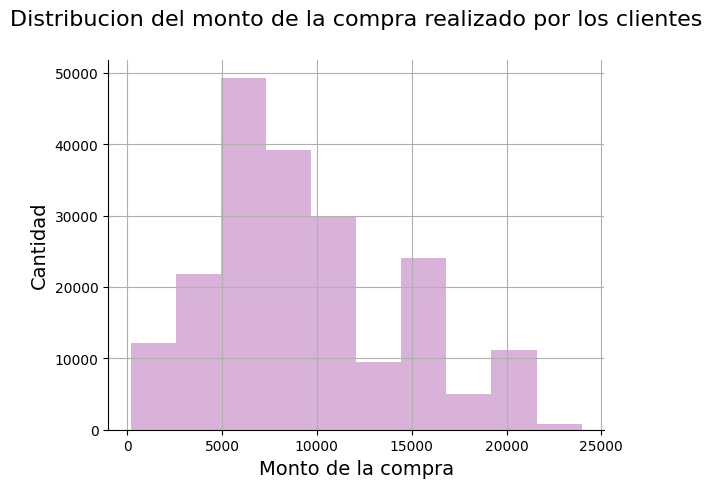

In [9]:
# Grafico Age
plt.figure()# Como importamos el are del  dibujo
plt.hist(blackfriday['Purchase'].dropna(), bins=10, color="purple", alpha=0.3)# Hist significa como genera el histograma , luego utiliza la funcion "dropna" elimina las celdas nulas, "bins" son la cantidad de barras que voy a utilizar y que sea representativa, luego defino el color y con alpha me define la intensidad del color
plt.ylabel("Cantidad", size=14) # Label es para poner el nombre de los titulos de los ejes "Y" y con size defino el tamaño de la letra
plt.xlabel("Monto de la compra", size=14)# Label es par poner el nombre de los titulos del eje "x" , con size defino el tamaño de la letra
plt.title("Distribucion del monto de la compra realizado por los clientes", size=16, pad=25)# Title es el nombre del grafico y de tamaño 16 de la letra
plt.gca().spines["top"].set_visible(False)# son "spine" termino de redondear el area del grafico y con Tue o false de el recuadro del grafico
plt.gca().spines["right"].set_visible(False)
plt.grid(True)# Con "grid", pone loas lineas con que se divide como por ejemplo de 0 a 5000 de 5000 a 10000 son esas lineas y si ponemos False las elimina las deja invisibles
plt.show()# Y esto es super importante porque te muestra el grafico sino de lo contrario no veriamos nada

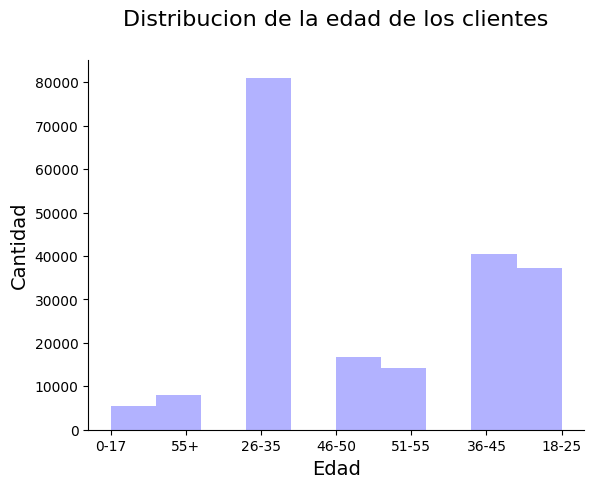

In [10]:
# Grafico Age
plt.figure()
plt.hist(blackfriday['Age'].dropna(), bins=10, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Edad", size=14)
plt.title("Distribucion de la edad de los clientes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

Mi pagina favorita para elegir [colores](https://

*   Elemento de la lista
*   Elemento de la lista

htmlcolorcodes.com/es/tabla-de-colores/)🎨 &nbsp;🖍

Tenemos un Link con la palesta de colores

#### Distplot:

<Figure size 640x480 with 0 Axes>

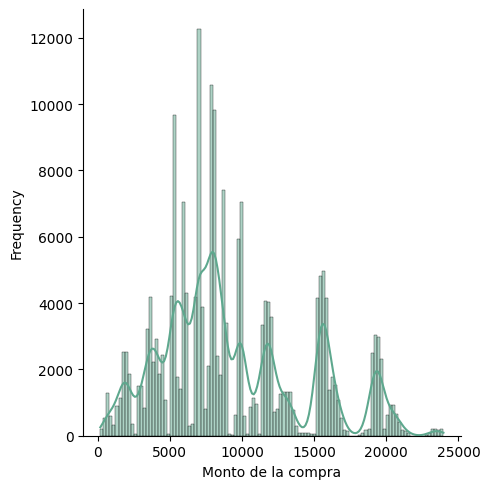

In [11]:
plt.figure()# son graficos solapados es el mismo datos de las compras
sns.displot(blackfriday["Purchase"], color="#5ea88e", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#### Boxplot:

In [ ]:
boxplot_blackfriday = blackfriday.melt(id_vars='City_Category', value_vars=['Purchase'])

In [ ]:
boxplot_blackfriday.head()

,City_Category,variable,value
0,A,Purchase,8370.0
1,A,Purchase,15200.0
2,A,Purchase,1422.0
3,A,Purchase,1057.0
4,C,Purchase,7969.0


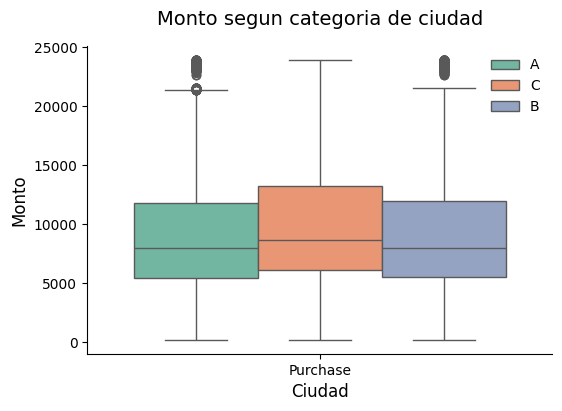

In [ ]:
plt.figure(figsize=(6, 4)) #Este grafico nos muestras los outlajer y como estan concentrados los valores entre la media de la categoria
sns.boxplot(x="variable", y="value", data=boxplot_blackfriday, palette="Set2", hue='City_Category')

plt.title('Monto segun categoria de ciudad', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Ciudad', size=12)
plt.ylabel('Monto', size=12)
sns.despine()
plt.show()

#### Scaterplot:

In [ ]:
plt.figure()
sns.scatterplot(x="Age", y="Purchase",data=blackfriday, palette="spring")
sns.despine()
plt.show();

NameError: name 'blackfriday' is not defined

<Figure size 640x480 with 0 Axes>

#### Countplot

Observa como se pueden ajustar la estetica del grafico (Vale para cualquier grafico).

<ipython-input-62-0428bfeb6525>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday.sort_values('Occupation'), palette="Set3")


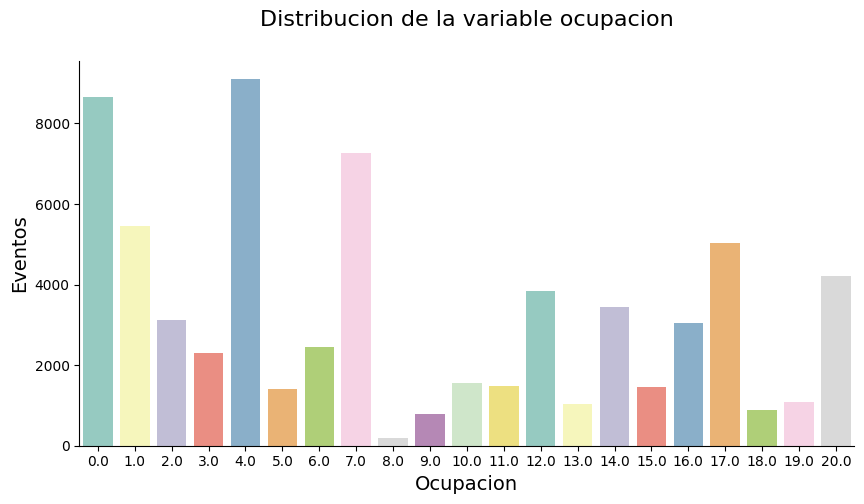

In [ ]:
plt.figure(figsize=(10,5))


sns.countplot(x="Occupation", data=blackfriday.sort_values('Occupation'), palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("Ocupacion", size=14)
plt.title("Distribucion de la variable ocupacion", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

<ipython-input-35-83a0a9d0502b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=blackfriday, palette="Set3")


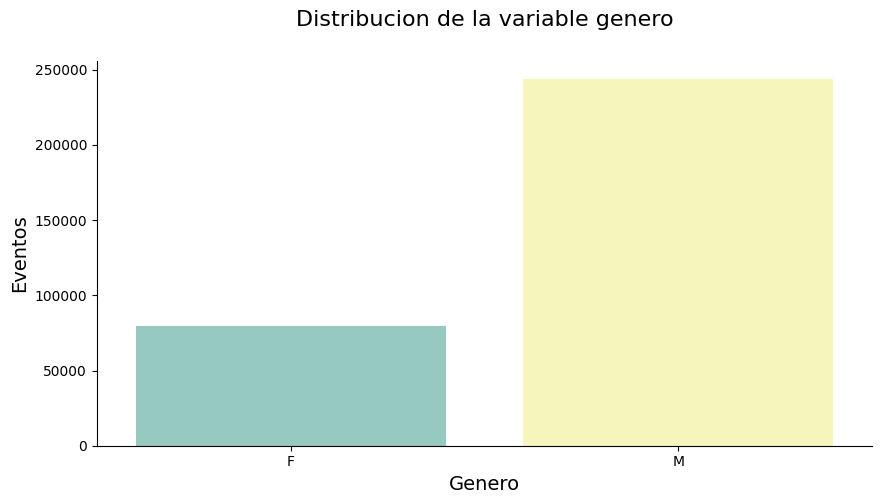

In [ ]:
plt.figure(figsize=(10,5))


sns.countplot(x="Gender", data=blackfriday, palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("Genero", size=14)
plt.title("Distribucion de la variable genero", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

#### Graficos solapados

<Figure size 640x480 with 0 Axes>

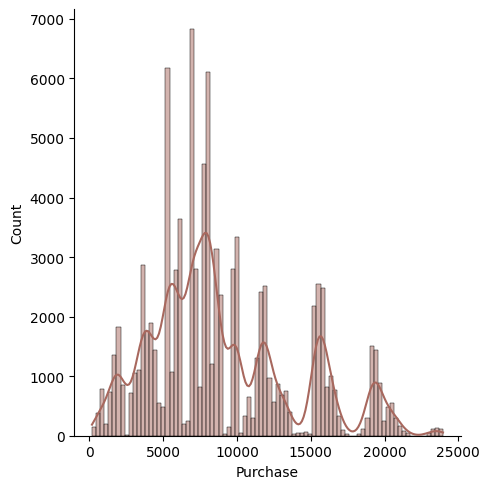

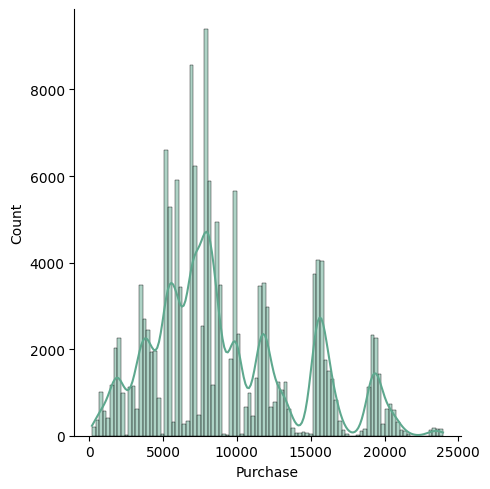

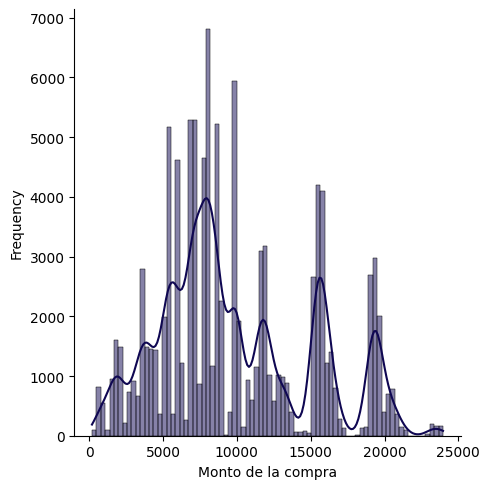

In [ ]:
plt.figure()
sns.displot(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show();

#### Subplots

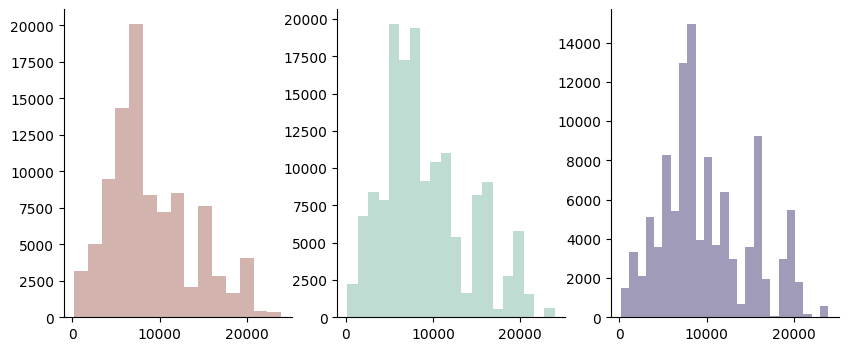

In [ ]:
# Inicio subplots# Son la comparación de una misma variable
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4)) # Subplots vemos la variable compras para las tres cuidades  A , B C y lo definimos como una comparación en una sola fila "nrows" y "ncoles" son tres graficos uno al lado del otro y con figtsize determinamos el tamaño de cada uno
# Establezco colores
colors = np.arange(959)
# primer grafico
ax[0].hist(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", alpha=0.5, bins=15)
# segundo grafico
ax[1].hist(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", alpha=0.4, bins=20)
# tercer grafico
ax[2].hist(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", alpha=0.4,  bins=25)
# modifico primer grafico
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
# modifico segundo grafico
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# modifico tercer grafico
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
plt.show()

#### Pairplot

In [ ]:
# Con los graficos pairplot compara una variable con "hue" que es Genero respecto a edad , compras cuidad , compras y palette determina la paleta de colores


In [12]:
blackfriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

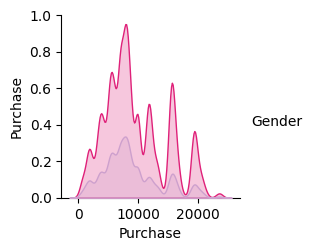

In [13]:
sns.pairplot(blackfriday[['Stay_In_Current_City_Years', 'Age', 'Purchase', 'Gender']], hue='Gender', palette='PuRd');

In [14]:
corr = blackfriday[['Age', 'Stay_In_Current_City_Years', 'Purchase']].corr(method = 'pearson')# Falta resolver esta variable de convertir e texto en numero

ValueError: could not convert string to float: '0-17'

In [ ]:
sns.heatmap(corr, cmap='YlGnBu', annot=True);

NameError: name 'corr' is not defined

**Otros ejemplos de gráficos**: [Ejemplos en Matplotlib](https://matplotlib.org/3.1.0/gallery/index.html) y [Ejemplos en Seaborn](https://seaborn.pydata.org/examples/index.html)